<center><h1>Gunadi_Eben_HW5</h1></center>
<br>
<br>

Name: Eben Gunadi
<br>
Github Username: egunadi
<br>
USC ID: 3976793880

## 1. Take the same image as you selected for doing the FFT and the Cosine Transform for previous homework, select a radius of your own choice in the frequency domain

### (a) Display the image.

Import packages

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct
from scipy.fftpack import idct
import pydicom
import os

Get the DICOM image

In [57]:
dicom_file = '../data/dcm/image12.dcm'
dicom_data = pydicom.dcmread(dicom_file)

# Extract pixel array from DICOM
dicom_image = dicom_data.pixel_array

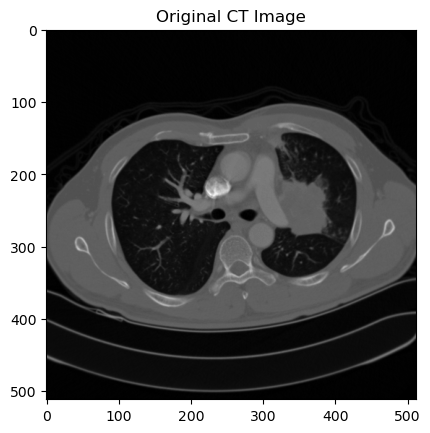

In [60]:
# Plot the image
plt.imshow(dicom_image, cmap='gray')
plt.title('Original CT Image')

# Save the original image as .png file
if not os.path.exists('../data/png'):
    os.makedirs('../data/png')

plt.savefig('../data/png/Original_image.png', bbox_inches='tight')

plt.show()

### (b) Perform the Cosine Transform & display it.

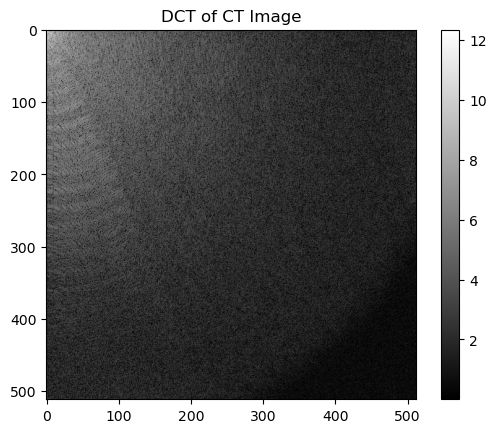

In [61]:
# Perform 2D Discrete Cosine Transform (DCT)
dct_transformed = dct(dct(dicom_image.T, norm='ortho').T, norm='ortho')

# Plot the DCT result
plt.imshow(np.log(abs(dct_transformed) + 1), cmap='gray')
plt.title('DCT of CT Image')
plt.colorbar()

# Save the DCT image as .png file
plt.savefig('../data/png/DCT_image.png', bbox_inches='tight')

plt.show()

### (c) Pick a radius value & delete all frequency components outside of the radius & display it.

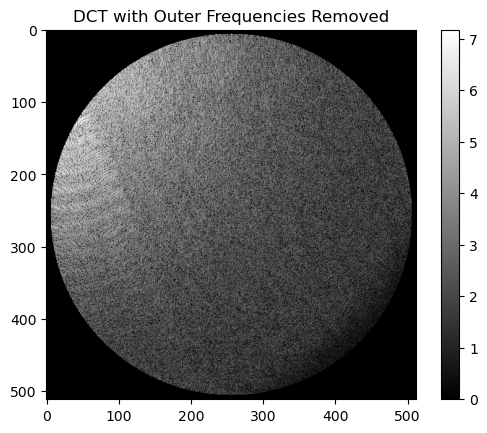

In [62]:
# Pick a radius value
radius = 250

# Create a circular mask directly
h, w = dct_transformed.shape
y, x = np.ogrid[:h, :w]
center = (h // 2, w // 2)
distance_from_center = np.sqrt((x - center[1])**2 + (y - center[0])**2)
mask = distance_from_center <= radius

# Apply the mask to the DCT-transformed image
dct_transformed_filtered = dct_transformed * mask


plt.imshow(np.log(abs(dct_transformed_filtered) + 1), cmap='gray')
plt.title('DCT with Outer Frequencies Removed')
plt.colorbar()

# Save and display the masked DCT image (log scale for visualization)
plt.savefig('../data/png/DCT_outer_image.png', bbox_inches='tight')

plt.show()

### (d) Compute the inverse transform & display it.

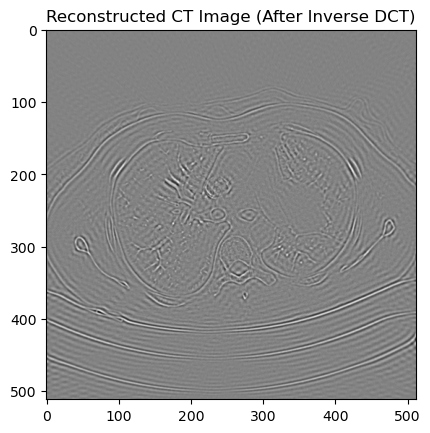

In [63]:
# Perform 2D Inverse Discrete Cosine Transform (IDCT)
dicom_image_filtered = idct(idct(dct_transformed_filtered.T, norm='ortho').T, norm='ortho')


# Plot the filtered image
plt.imshow(dicom_image_filtered, cmap='gray')
plt.title('Reconstructed CT Image (After Inverse DCT)')

# Save the filtered image as .png file
plt.savefig('../data/png/IDCT_outer_image.png', bbox_inches='tight')

plt.show()

### (e) Please comment on the results.

By removing the frequency components outside of the radius, only the high-frequency components (closer to the center of the DCT) were retained. These high-frequency components emphasize edges and sharp details, not the overall structure and broad transitions of the image. This is why the reconstructed image looks like a collection of intricate, fragmented lines. 

### (f) Delete all frequency components inside the radius & display it.

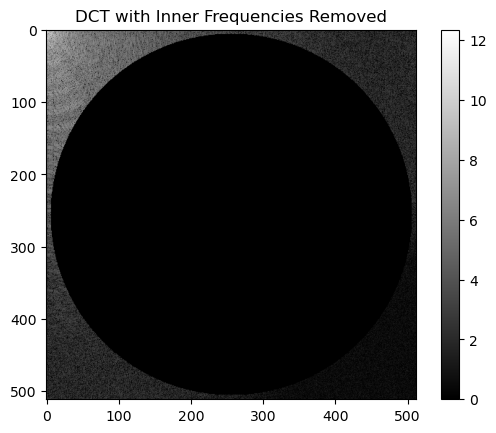

In [64]:
# Create a circular mask for deleting inner frequencies
h, w = dct_transformed.shape
y, x = np.ogrid[:h, :w]
center = (h // 2, w // 2)
distance_from_center = np.sqrt((x - center[1])**2 + (y - center[0])**2)
mask = distance_from_center > radius  # Change the condition to keep only outer frequencies

# Apply the mask to the DCT-transformed image
dct_transformed_inner_removed = dct_transformed * mask

plt.imshow(np.log(abs(dct_transformed_inner_removed) + 1), cmap='gray')
plt.title('DCT with Inner Frequencies Removed')
plt.colorbar()

# Save and display the masked DCT image (log scale for visualization)
plt.savefig('../data/png/DCT_inner_image.png', bbox_inches='tight')

plt.show()

### (g) Compute the inverse transform & display it.

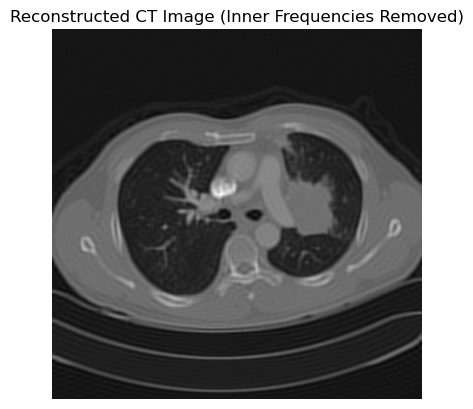

In [65]:
# Perform 2D Inverse Discrete Cosine Transform (IDCT)
dicom_image_inner_removed = idct(idct(dct_transformed_inner_removed.T, norm='ortho').T, norm='ortho')

# Plot the filtered image
plt.imshow(dicom_image_inner_removed, cmap='gray')
plt.title('Reconstructed CT Image (Inner Frequencies Removed)')
plt.axis('off')

# Save the filtered image as .png file
plt.savefig('../data/png/IDCT_inner_image.png', bbox_inches='tight')

plt.show()

### (h) Please comment on the results.

By removing the frequency components inside of the radius, the low-frequency components at the top-left corner of the DCT were retained. These low-frequency components emphasize smooth sections and broad transitions, not so much the fine or sharp details of the image. This is why the reconstructed image retains the general structure of the original image, albeit looking slightly smoother or blurrier.

### (i) Give a general short discussion on what you learned from this question.

Although only a small fraction of the DCT, the low-frequency components at the top-left corner are crucial for preserving the overall shape and structure of the image. Conversely, the high-frequency components further from the top-left corner are responsible for the fine or sharp details of the image. By retaining the low-frequency components and removing the high-frequency ones, we can perform image compression while preserving most of the recognizable visual information.

## 2. Take the same image as above. Extract the DICOM header. List all the Tag Names and the associated Tag Data (eg, Patient Name: John Doe, etc.)

In [ ]:
# Extract the DICOM header
dicom_header = dicom_data.dir()

# Print all the Tag Names and the associated Tag Data
for tag in dicom_header:
    print(f'{tag}: {dicom_data.data_element(tag).value}')

# Save the extracted header as a text file
if not os.path.exists('../data/txt'):
    os.makedirs('../data/txt')
    
with open('../data/txt/image12_header.txt', 'w') as f:
    for tag in dicom_header:
        f.write(f'{tag}: {dicom_data.data_element(tag).value}\n')

AccessionNumber: 24365
AcquisitionDate: 20050325
AcquisitionNumber: 3
AcquisitionTime: 101057.990946
AdditionalPatientHistory: lung ca
BitsAllocated: 16
BitsStored: 16
BodyPartExamined: ABDOMEN
Columns: 512
ContentDate: 20050325
ContentTime: 101057.990946
ConvolutionKernel: B41f
DataCollectionDiameter: 500
DateOfLastCalibration: 20050325
DeviceSerialNumber: 53153
DistanceSourceToDetector: 1040
DistanceSourceToPatient: 570
Exposure: 105
ExposureTime: 500
FilterType: 0
FocalSpots: 1.2
FrameOfReferenceUID: 1.3.12.2.1107.5.1.4.53153.30000005032514354823400000080
GantryDetectorTilt: 0
GeneratorPower: 34
HighBit: 15
ImageComments: ISOVUE 370(100ml)
ImageOrientationPatient: [1, 0, 0, 0, 1, 0]
ImagePositionPatient: [-159.654, -306.654, 1520.5]
ImageType: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
InstanceNumber: 44
InstitutionAddress: San Pablo
Los Angeles/E8D954/
Los Angeles
USA
InstitutionName: USC RADIOLOGY ASSOCIATES, INC.
KVP: 120
LargestImagePixelValue: 2884
Manufacturer: SIEMENS
Ma

In [54]:
# Extract and display the DICOM header information
for element in dicom_data:
    if element.VR != 'SQ':  # Skip sequences for simplicity
        print(f"{element.name}: {element.value}")

Image Type: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
SOP Class UID: 1.2.840.10008.5.1.4.1.1.2
SOP Instance UID: 1.3.6.1.4.1.9590.100.1.1.29926650613356346005006375774274861256
Study Date: 20050325
Series Date: 20050325
Acquisition Date: 20050325
Content Date: 20050325
Study Time: 100547.500000
Series Time: 100919.234000
Acquisition Time: 101057.990946
Content Time: 101057.990946
Accession Number: 24365
Modality: CT
Manufacturer: SIEMENS
Institution Name: USC RADIOLOGY ASSOCIATES, INC.
Institution Address: San Pablo
Los Angeles/E8D954/
Los Angeles
USA
Referring Physician's Name: DEARTOLA^IGNACIO
Station Name: HCC2CTNAV1
Study Description: CT CHEST, WITH CONTRAST
Series Description: ThorRoutine ST 3.0  B41f
Physician(s) of Record: DEARTOLA^IGNACIO
Name of Physician(s) Reading Study: 
Operators' Name: EP
Manufacturer's Model Name: Sensation 10
Patient's Name: anonymus
Patient ID: 626457
Patient's Birth Date: 19500220
Patient's Sex: M
Patient's Age: 055Y
Additional Patient History: 

## References and Citations

- https://scikit-image.org/docs/stable/user_guide/install.html